In [14]:
import pandas as pd
import scipy.io
import os
import matplotlib.pyplot as plt

path = os.getcwd()

matlab_exe_path = '''matlab'''

path = "src\\calibration"
#fig_path = "C:\\users\mwaugh\\github\\perla_tonetti_waugh\\Figures"

---
## 7.5. The Role of Firm Dynamics and Adoption Costs

#### Contents

- [GBM](#gbm)

- [Delta Shock](#detla)

The underlying MATLAB code is completly described (with links to the appropriate ``.m`` files) in the [readme file in the calibraiton folder](/src/calibration/README.md).

---

### <a name="gbm"></a> Importance of the GBM

We uniformally scale up and down the GBM variance and mean for different values of the adoption cost parameter. The large value which is ten percent larger than the baseline calibrated value. The small value which is ten percent smaller than the baseline calibrated value. All other parameter values are fixed, i.e., we do not re-calibrate the model when changing these parameter values. 

##### Step 1. Compute outcomes for different GBM parameter values

This calls the matlab code to perform this operation. The code appendix below describes each of the different components. The line below executes matlab from the command line/terminal

In [15]:
matlab_cmd = '''"cd('src\calibration');robust_no_recalibrate_gbm;"'''

In [16]:
!{matlab_exe_path} -batch {matlab_cmd}

Calbirated values computed on date
   13-Apr-2020

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Chi Values
    0.1409

Parameters for given chi which deliver growth closest to baseline growth
d, theta, kappa, 1/chi, mu, upsilon, sigma, delta, rho
    0.0080    3.0225    4.9890    0.1042    7.0952   -0.0251    0.0390    3.1669    0.0200    0.0203

Chi Values
    0.1268

Parameters for given chi which deliver growth closest to baseline growth
d, theta, kappa, 1/chi, mu, upsilon, sigma, delta, rho
    0.0079    2.8202    4.9890    0.1042    7.8835   -0.0311    0.0483    3.1669    0.0200    0.0203

Chi Values
    0.1153

Parameters for given chi which deliver growth closest to baseline growth
d, theta, kappa, 1/chi, mu, upsilon, sigma, delta, rho
    0.0079    3.0225    4.9890    0.1042    8.6719   -0.0372    0.0579    3.1669    0.0200    0.0203



##### Step 2. Create Figure 6 in PTW 2020

The code below reads in the output from matlab and then plots the results in accord with those in Figure 6 of PTW.

In [17]:
cnames = ['gold', 'gnew', 'gdiff', "welfare", 'upsilon']

mat = scipy.io.loadmat(path + "\\output\\robust\\gbm\\norecalibrate_values_gbm_1.mat")

nocaldf = pd.DataFrame(mat["record_values"])

nocaldf.columns = cnames
nocaldf["gdiff"] = -nocaldf["gdiff"] 

nocaldf.sort_values(["upsilon"], inplace = True)

base_chi = str(round(mat["chi_value"][0][0],3))

In [18]:
mat = scipy.io.loadmat(path + "\\output\\robust\\gbm\\norecalibrate_values_gbm_0.9.mat")

nocaldf_lowchi = pd.DataFrame(mat["record_values"])

nocaldf_lowchi.columns = cnames
nocaldf_lowchi["gdiff"] = -nocaldf_lowchi["gdiff"] 

nocaldf_lowchi.sort_values(["upsilon"], inplace = True)

low_chi = str(round(mat["chi_value"][0][0],3))

In [19]:
mat = scipy.io.loadmat(path + "\\output\\robust\\gbm\\norecalibrate_values_gbm_1.1.mat")

nocaldf_higchi = pd.DataFrame(mat["record_values"])

nocaldf_higchi.columns = cnames
nocaldf_higchi["gdiff"] = -nocaldf_higchi["gdiff"] 
nocaldf_higchi.sort_values(["upsilon"], inplace = True)

hig_chi = str(round(mat["chi_value"][0][0],3))

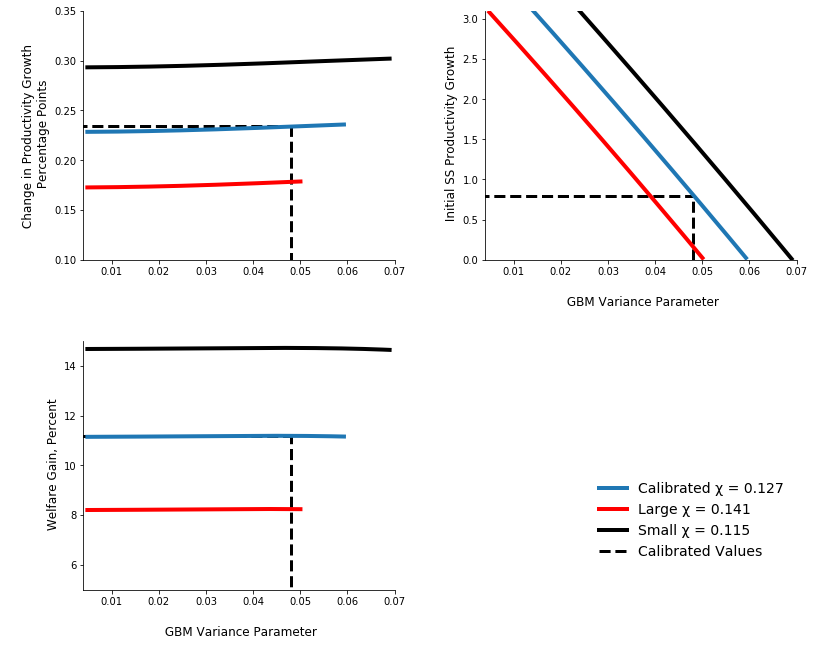

In [20]:
fig, ax = plt.subplots(2,2,figsize = (12,10))

fig.tight_layout(pad = 6)


position = (0,0)

ax[position].plot(nocaldf.upsilon, 100*nocaldf["gdiff"], lw = 4)

ax[position].plot(nocaldf_lowchi.upsilon, 100*nocaldf_lowchi["gdiff"], lw = 4, color = 'r')

ax[position].plot(nocaldf_higchi.upsilon, 100*nocaldf_higchi["gdiff"], lw = 4, color = 'k')

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.004,0.07)
ax[position].set_ylim(0.10,0.35)
ax[position].set_ylabel("\n Change in Productivity Growth \n Percentage Points", fontsize = 12)

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)

ax[position].vlines(0.048, 0.00, 0.234,  
           color='k',      
           linestyle='--',
           lw = 3)    

ax[position].hlines(0.234, -0.001, 0.048 ,           
           color='k',       
           label="Calibrated Values",
           linestyle='--',
           lw = 3)    


###################################################################################

position = (0,1)

ax[position].plot(nocaldf.upsilon, 100*nocaldf["gold"], lw = 4,  label = "Calibrated χ = " + base_chi)

ax[position].plot(nocaldf_lowchi.upsilon, 100*nocaldf_lowchi["gold"], lw = 4, color = 'red', label = "Large χ = " + low_chi)

ax[position].plot(nocaldf_higchi.upsilon, 100*nocaldf_higchi["gold"], lw = 4, color = 'k', label = "Small χ = " + hig_chi)

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.004,0.07)
ax[position].set_ylim(0.0,3.10)
#ax.set_ylim(0,0.40)
ax[position].set_xlabel("\n GBM Variance Parameter", fontsize = 12)
ax[position].set_ylabel("\n Initial SS Productivity Growth", fontsize = 12)

ax[position].hlines(0.79, -0.001, 0.048,
           color='k',       
           label="Calibrated Values",
           linestyle='--',
           lw = 3)  

ax[position].vlines(0.048, 0, 0.79,   
           color='k',   
           linestyle='--',
           lw = 3)  

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)

ax[position].legend(bbox_to_anchor=(0., -1.25, 1., .102),frameon = False, fontsize = 14, loc = 4)

#########################################################################################

position = (1,0)

series = "welfare"

ax[position].plot(nocaldf.upsilon, 100*nocaldf[series], lw = 4,  label = "Calibrated χ")

ax[position].plot(nocaldf_lowchi.upsilon, 100*nocaldf_lowchi[series], lw = 4, color = 'red', label = "Large χ")

ax[position].plot(nocaldf_higchi.upsilon, 100*nocaldf_higchi[series], lw = 4, color = 'k', label = "Small χ")

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.004,0.07)
ax[position].set_ylim(5,15)
#ax.set_ylim(0,0.40)
ax[position].set_xlabel("\n GBM Variance Parameter", fontsize = 12)
ax[position].set_ylabel("\n Welfare Gain, Percent", fontsize = 12)

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)


ax[position].vlines(0.048, 0, 11.18, 
           color='k',  
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].hlines(11.18, -0.001, 0.048 , 
           color='k',       
           label="Calibrated Values", 
           linestyle='--',
           lw = 3)  

#############################################################################################
position = (1,1)

ax[position].axis('off')

#plt.savefig(fig_path + "\\gbm_chi.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

##### Discussion of these results from PTW text
The first thing to observe from Figure 6 is that the percentage point change in productivity is nearly constant across different values of the variance parameter. In other words, the variance does not much affect the response of growth to a change in trade costs.

The parameter which does influence the change in growth is the adoption cost parameter. The three
different lines on the left panel in Figure 6 illustrate this point. A small value of chi (top black line) corresponds to small costs of adoption. When adoption costs are small, growth is more responsive to changes in trade costs. In contrast, a large value of chi (bottom red line) corresponds to large adoption costs and a smaller response of growth to trade costs. The closed form equations available in the non-GBM version of the model deliver some insight. Equation 35 shows that the change in the growth rate for a given change in trade costs is larger when adoption costs are smaller.

Even though the elasticity of growth to trade costs is not sensitive to the value of 2 holding adoption costs constant, the value of 2—and, thus, the firm dynamics data—strongly influences the calibrated value of the adoption cost. The right panel in Figure 6 illustrates this point by tracing out how the growth rate in the initial steady state varies with 2. For a given value, there is a near linear decrease in the steady state growth rate as the variance increases. Across  values, the slope is essentially the same, but the intercept shifts, with smaller  values leading to higher growth rates. This is intuitive—lower adoption costs lead to more adoption and faster economic growth.

The implication of these observations is that data on firm dynamics influences the inferred adoption cost and, thus, the elasticity of growth to trade costs. For example, holding fixed our target of an aggregate growth rate of 0.79 percent, if the transition matrix of relative size (Table 3) had pushed for us to find a smaller value for 2, then the right panel of Figure 6 shows this would have lead us to calibrate a larger value for . Combining this observation with the left panel of Figure 6, our calibration strategy would have then led to a smaller increase in the growth rate for the same decrease in trade costs.

The lower panel of Figure 6 shows that the welfare gains from trade (comparing BGPs) are nearly constant across values of 2, but sensitive to the value of , just like the elasticity of growth to trade costs. Thus, the value of  is crucial for determining both the change in growth and the welfare gains from trade. Even though 2 does not much affect the welfare gains from trade when holding all other parameters constant, different values of 2 (which are associated with different firm dynamics moments) affect the calibration of . It is in this sense that not just firm heterogeneity, but firm dynamics, matter
for the welfare gains from trade in our model.

Our discussion above, which compares our gains from trade to those in Sampson (2016), strongly suggests this point as well. When the GBM process is shut down and the model is re-calibrated, the gains from trade are still larger than what the ACR formula would imply, but they are far more modest and in line with what Sampson finds. Recall from Section 7.3 that much of the welfare gains arise because the equilibrium has an inefficiently low growth rate and that changes in trade costs change the growth rate. Using the decomposition from Section 7.3, we find that the different values of  associated with different
values of 2 affect the welfare gains from trade almost completely because of a change in the sensitivity
of growth to the trade cost and not because of different levels of inefficiency

This point is illustrated below...

In [21]:
# Call decomposition notebook

---

### <a name="delta"></a> Importance of the Exit Shock?

We uniformally scale up and down the exit shock for different values of the adoption cost parameter. The large value which is ten percent larger than the baseline calibrated value. The small value which is ten percent smaller than the baseline calibrated value. All other parameter values are fixed, i.e., we do not re-calibrate the model when changing these parameter values. 

##### Step 1. Compute outcomes for different Delta parameter values

This calls the matlab code to perform this operation. The code appendix below describes each of the different components. The line below executes matlab from the command line/terminal

In [22]:
matlab_cmd = '''"cd('src\calibration');robust_no_recalibrate_delta;"'''

In [23]:
!{matlab_exe_path} -batch {matlab_cmd}

Calbirated values computed on date
   13-Apr-2020

%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Chi Values
    0.1409

Chi Values
    0.1268

Chi Values
    0.1153



##### Step 2. Create Figure 7 in PTW 2020

The code below reads in the output from matlab and then plots the results in accord with those in Figure 6 of PTW.

In [24]:
cnames = ['gold', 'gnew', 'gdiff', "welfare", 'delta']

mat = scipy.io.loadmat(path + "\\output\\robust\\delta\\norecalibrate_values_delta_1.mat")

nocaldf = pd.DataFrame(mat["record_values"])

nocaldf.columns = cnames
nocaldf["gdiff"] = -nocaldf["gdiff"] 

nocaldf.sort_values(["delta"], inplace = True)

base_chi = str(round(mat["chi_value"][0][0],3))

In [25]:
mat = scipy.io.loadmat(path + "\\output\\robust\\delta\\norecalibrate_values_delta_0.9.mat")

nocaldf_lowchi = pd.DataFrame(mat["record_values"])

nocaldf_lowchi.columns = cnames
nocaldf_lowchi["gdiff"] = -nocaldf_lowchi["gdiff"] 

nocaldf_lowchi.sort_values(["delta"], inplace = True)

low_chi = str(round(mat["chi_value"][0][0],3))

In [26]:
mat = scipy.io.loadmat(path + "\\output\\robust\\delta\\norecalibrate_values_delta_1.1.mat")

nocaldf_higchi = pd.DataFrame(mat["record_values"])

nocaldf_higchi.columns = cnames
nocaldf_higchi["gdiff"] = -nocaldf_higchi["gdiff"]

nocaldf_higchi.sort_values(["delta"], inplace = True)

hig_chi = str(round(mat["chi_value"][0][0],3))

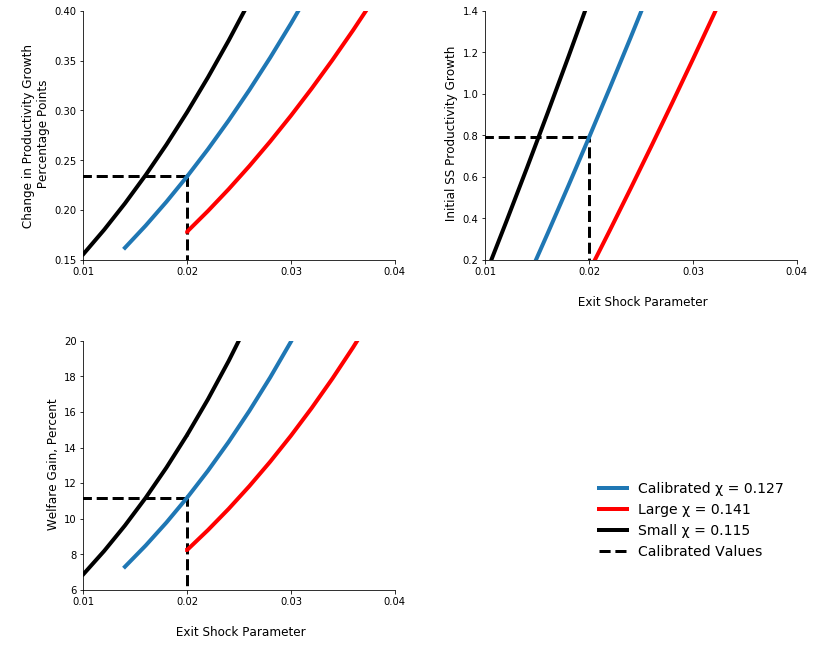

In [27]:
fig, ax = plt.subplots(2,2,figsize = (12,10))

fig.tight_layout(pad = 6)


position = (0,0)

ax[position].plot(nocaldf.delta, 100*nocaldf["gdiff"], lw = 4)

ax[position].plot(nocaldf_lowchi.delta, 100*nocaldf_lowchi["gdiff"], lw = 4, color = 'r')

ax[position].plot(nocaldf_higchi.delta, 100*nocaldf_higchi["gdiff"], lw = 4, color = 'k')

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.01,0.04)
ax[position].set_ylim(0.15,0.4)
#ax[position].set_xlabel("\n GBM Variance Parameter", fontsize = 12)
ax[position].set_ylabel("\n Change in Productivity Growth \n Percentage Points", fontsize = 12)

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)

ax[position].vlines(0.020, 0.00, 0.234,           # Set the value equall to the average
           color='k',       # make the color red
           #label='Trade Shock', # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].hlines(0.234, -0.001, 0.020 ,           # Set the value equall to the average
           color='k',       # make the color red
           label="Calibrated Values", # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line


##########################################################################################

position = (0,1)

ax[position].plot(nocaldf.delta, 100*nocaldf["gold"], lw = 4,  label = "Calibrated χ = " + base_chi)

ax[position].plot(nocaldf_lowchi.delta, 100*nocaldf_lowchi["gold"], 
                  lw = 4, color = 'red', label = "Large χ = " + low_chi)

ax[position].plot(nocaldf_higchi.delta, 100*nocaldf_higchi["gold"], 
                  lw = 4, color = 'k', label = "Small χ = " + hig_chi)

#ax[1].plot(nocaldf_bigchi.upsilon, 100*nocaldf_bigchi["gold"], lw = 4, color = 'k', label = "Large 1/chi")

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.01,0.04)
ax[position].set_ylim(0.20,1.4)
#ax.set_ylim(0,0.40)
ax[position].set_xlabel("\n Exit Shock Parameter", fontsize = 12)
ax[position].set_ylabel("\n Initial SS Productivity Growth", fontsize = 12)

ax[position].vlines(0.02, 0.00, 0.79,           # Set the value equall to the average
           color='k',       # make the color red
           #label='Trade Shock', # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].hlines(0.79, -0.001, 0.020 ,           # Set the value equall to the average
           color='k',       # make the color red
           label="Calibrated Values", # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)

ax[position].legend(bbox_to_anchor=(0., -1.25, 1., .102),frameon = False, fontsize = 14, loc = 4)

#########################################################################################
position = (1,0)

series = "welfare"

ax[position].plot(nocaldf.delta, 100*nocaldf[series], lw = 4,  label = "Calibrated χ")

ax[position].plot(nocaldf_lowchi.delta, 100*nocaldf_lowchi[series], lw = 4, color = 'red', label = "Large χ")

ax[position].plot(nocaldf_higchi.delta, 100*nocaldf_higchi[series], lw = 4, color = 'k', label = "Small χ")

#ax[1].plot(nocaldf_bigchi.upsilon, 100*nocaldf_bigchi["gold"], lw = 4, color = 'k', label = "Large 1/chi")

xticks = [0.01*float(item) for item in list(range(1,11,1)) ]

ax[position].set_xticks(xticks)

ax[position].set_xlim(0.01,0.04)
ax[position].set_ylim(6,20)
#ax.set_ylim(0,0.40)
ax[position].set_xlabel("\n Exit Shock Parameter", fontsize = 12)
ax[position].set_ylabel("\n Welfare Gain, Percent", fontsize = 12)

ax[position].spines["right"].set_visible(False)
ax[position].spines["top"].set_visible(False)


ax[position].vlines(0.02, 0, 11.18,           # Set the value equall to the average
           color='k',       # make the color red
           #label='Trade Shock', # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

ax[position].hlines(11.18, -0.001, 0.02 ,           # Set the value equall to the average
           color='k',       # make the color red
           label="Calibrated Values", # this is the label (shows up in the legend)
           linestyle='--',
           lw = 3)     # thickness of the line

###############################################################################################
position = (1,1)

ax[position].axis('off')

#plt.savefig(fig_path + "\\delta_chi.pdf", bbox_inches = "tight", dip = 3600)

plt.show()

##### Discussion of Figure from paper

Similarly to the GBM variance case, the  parameter interacts with the adoption cost parameter to affect the calibrated value of . The right panel in Figure 6 illustrates this point by tracing out how the growth rate in the initial steady state varies with . For a given  value, the steady state growth rate increases with ; across  values, smaller  values (lower adoption costs) lead to higher growth rates. Figure 6 shows that larger  values (i.e., more entry observed in the data) would induce the calibration to infer larger  values. But because these two parameters have opposite effects on economic growth, the change
in parameter values generates offsetting effects and leaves the model’s elasticity of growth to trade costs unchanged

The welfare gains from trade display a similar pattern. The bottom panel of Figure 7 shows that the welfare gains from trade increase with the value of , holding all else fixed. Again, however, larger values of  generate larger calibrated values of , which offset to keep the welfare gains from trade largely unchanged. Re-calibrating the model holding fixed different values for  verifies this observation—welfare only increases slightly as  increases.